In [13]:
import os
import pandas as pd


In [15]:
FAKE_DIR = r"D:\Placement_Projects\FinalYear\Multilingual\Hindi_fake_news"
REAL_DIR = r"D:\Placement_Projects\FinalYear\Multilingual\Hindi_real_news"

data = []

In [16]:
# for fake 1
for filename in os.listdir(FAKE_DIR):
    if filename.endswith(".txt"):
        with open(os.path.join(FAKE_DIR, filename), "r", encoding="utf-8") as f:
            text = f.read().strip()
            data.append([text, 1])

In [17]:
# for real 0
for filename in os.listdir(REAL_DIR):
    if filename.endswith(".txt"):
        with open(os.path.join(REAL_DIR, filename), "r", encoding="utf-8") as f:
            text = f.read().strip()
            data.append([text, 0])

df = pd.DataFrame(data, columns=["input_text", "target"])

In [18]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
# shuffle


In [19]:
df.head()

,input_text,target
0,हनीमून छोड़ किसान आंदोलन में साग-रोटी खा रहे क...,1
1,गर्मियों में निखरी त्वचा पाने का राज़\n\n\nनई ...,0
2,इराक का पुराना वीडियो इजरायली बलों द्वारा अल अ...,1
3,अमेरिकी दौरे के बीच पीएम मोदी और रिहाना की डिज...,1
4,"""शाहरुख खान की सबसे खराब फिल्म"" कहने वाले दर्श...",1


In [20]:
df.shape

(20593, 2)

In [21]:
df.isnull().sum()

input_text    0
target        0
dtype: int64

In [23]:
df['target'].value_counts()

target
0    10300
1    10293
Name: count, dtype: int64

In [27]:
hindi_stopwords = set([
    "के","की","का","को","से","है","था","थे","ही","भी","में","पर","और","तो","जब",
    "कि","यह","ये","वे","उस","एक","एवं","तक","नहीं","हाँ","या","लेकिन","क्योंकि",
    "अपने","आप","हम","आपको","इसके","कई","हो","गया","कहा","साथ","दिया","हुआ","होता",
    "थी","रहा","रही","रहे","हो","रहे","उनके","इन","उन","इस","था","थी"
])


In [25]:
def clean_hindi_text(text):
    import re, regex
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = regex.sub(r"[\p{Emoji_Presentation}\p{Emoji}\p{Extended_Pictographic}]", "", text)
    text = regex.sub(r"[^\p{Devanagari}\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    words = text.split()
    words = [w for w in words if w not in hindi_stopwords]
    words = [w for w in words if len(w) > 2]
    return " ".join(words)

In [28]:
df["clean_text"] = df["input_text"].apply(clean_hindi_text)

In [29]:
df.sample(5)

,input_text,target,clean_text
16145,शीर्षक उपलब्ध नहीं है\nबॉडी उपलब्ध नहीं है,1,शीर्षक उपलब्ध बॉडी उपलब्ध
13549,वायरल फर्जी मॉर्फ्ड क्लिप में उज्जैन में राहुल...,1,वायरल फर्जी मॉर्फ्ड क्लिप उज्जैन राहुल गांधी भ...
4631,‘ और इंडियन मुजाहिद्दीन के नाम में भी इंडिया’म...,0,इंडियन मुजाहिद्दीन नाम इंडिया मोदी विपक्ष धोया...
14187,पुराने वीडियो बेंगलुरु अस्पताल में सीओवीआईडी ​...,1,पुराने वीडियो बेंगलुरु अस्पताल सीओवीआईडी मरीजो...
7964,मैं चंद्रचूड़ से हाथ जोड़कर…किस बात पर बोले वि...,0,मैं चंद्रचूड़ हाथ जोड़कर किस बात बोले विवेक अग...


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=8000,
    ngram_range=(1,2),
)

X = tfidf.fit_transform(df["clean_text"])
y = df["target"]

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [33]:
models = {
    "SVC": SVC(kernel="linear"),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}


In [34]:
accuracy_results = {}
f1_results = {}

In [35]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    accuracy_results[name] = acc
    f1_results[name] = f1

Training SVC...
Training Logistic Regression...
Training Naive Bayes...
Training Random Forest...
Training Decision Tree...
Training KNN...
Training XGBoost...


In [36]:
result_table = pd.DataFrame({
    "Model": list(accuracy_results.keys()),
    "Accuracy": list(accuracy_results.values()),
    "F1 Score": list(f1_results.values())
})

In [37]:
result_table = pd.DataFrame({
    "Model": list(accuracy_results.keys()),
    "Accuracy": list(accuracy_results.values()),
    "F1 Score": list(f1_results.values())
})

In [38]:
result_table

,Model,Accuracy,F1 Score
0,SVC,0.986890,0.987000
1,Logistic Regression,0.984462,0.984593
2,Naive Bayes,0.912357,0.920115
3,Random Forest,0.991017,0.991142
4,Decision Tree,0.964797,0.965501
5,KNN,0.797524,0.832933
6,XGBoost,0.985919,0.986051


In [39]:
result_table = result_table.sort_values(by="Accuracy", ascending=False)
print("\nFinal Results:\n")
print(result_table)



Final Results:

                 Model  Accuracy  F1 Score
3        Random Forest  0.991017  0.991142
0                  SVC  0.986890  0.987000
6              XGBoost  0.985919  0.986051
1  Logistic Regression  0.984462  0.984593
4        Decision Tree  0.964797  0.965501
2          Naive Bayes  0.912357  0.920115
5                  KNN  0.797524  0.832933


In [40]:
import matplotlib.pyplot as plt


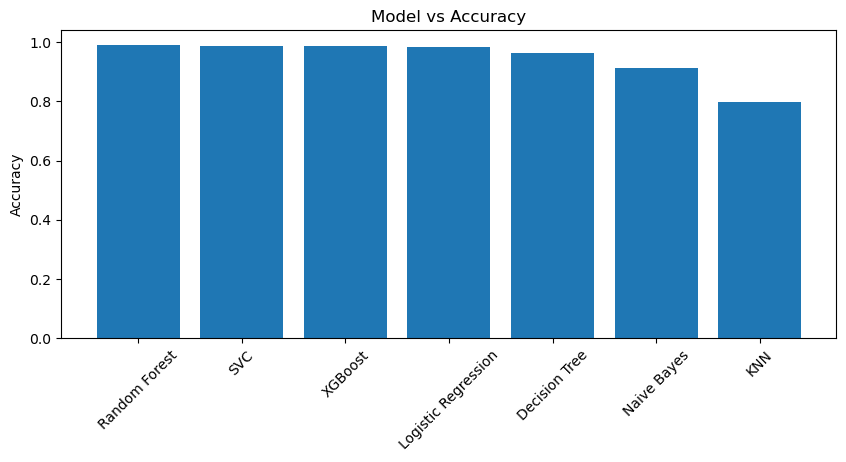

In [44]:
plt.figure(figsize=(10, 4))
plt.bar(result_table["Model"], result_table["Accuracy"])
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model vs Accuracy")
plt.show()

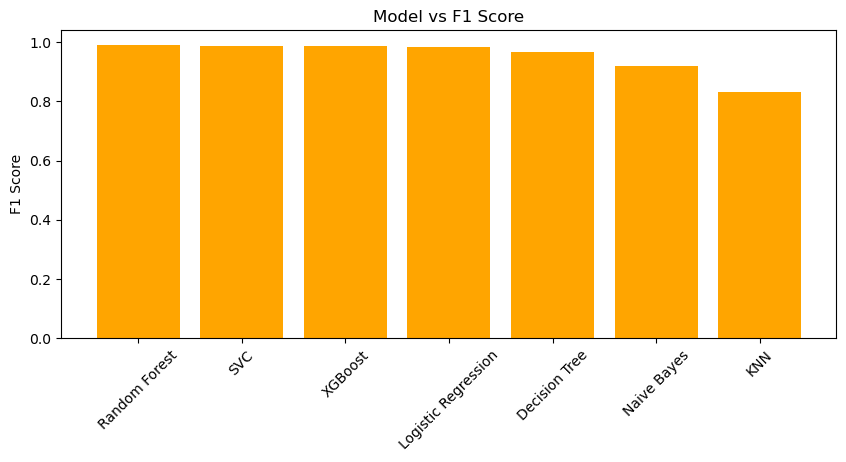

In [45]:
plt.figure(figsize=(10, 4))
plt.bar(result_table["Model"], result_table["F1 Score"], color="orange")
plt.xticks(rotation=45)
plt.ylabel("F1 Score")
plt.title("Model vs F1 Score")
plt.show()